In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.AutoUnet.AutoUnet_uniform import *
from NN_library.AutoUnet.train_AutoUnet import *
%load_ext autoreload
%autoreload 2

Using device: cuda


Test U-Net

In [2]:
data = dataset_uniform()
loaders = get_loaders(data, 1)

In [3]:
name = 'NN_library/AutoUnet/AutoUnet_uniform'
args = {'lr' : 0.001, 'epochs' : 20, 'dev' : dev, 'name' : name}
unet = AutoUNet()
unet = load_network(unet, args['name'], args)

In [6]:
Var, Var_true = test_blur(unet, loaders, args)

In [7]:
Var = np.array(Var)
Var_true = np.array(Var_true)

(0.0, 0.7)

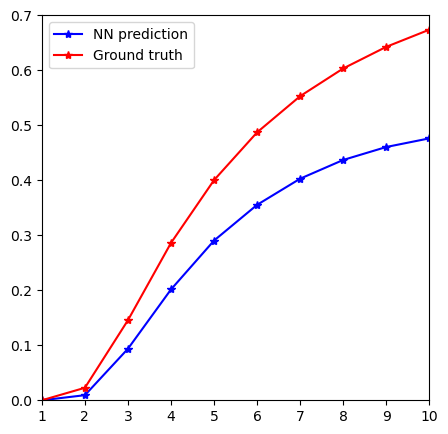

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), dpi=100)
axs.plot(np.arange(1, 11), Var.mean(axis=0), 'b-*')
axs.plot(np.arange(1, 11), Var_true.mean(axis=0), 'r-*')
axs.legend(['NN prediction', 'Ground truth'])
axs.set_xlim([1, 10])
axs.set_ylim([0, 0.7])

In [9]:
L_dam, L_dam_total = test(unet, loaders, args)
L_dam = np.array(L_dam)
L_dam_total = np.array(L_dam_total)

In [6]:
dam_mean = L_dam.mean()
dam_std = L_dam.std()
print('Mean damage error:', dam_mean)
print('Std damage error:', dam_std)

Mean damage error: 0.04355053
Std damage error: 0.03392016


In [12]:
dam_mean = np.mean(L_dam, axis=0)
dam_std = np.std(L_dam, axis=0)
dam_mean_total = np.mean(L_dam_total, axis=0)
dam_std_total = np.std(L_dam_total, axis=0)
print('Final mean damage', dam_mean[-1])
print('Final std damage', dam_std[-1])

Final mean damage 0.081210315
Final std damage 0.030757807


(0.0, 0.12)

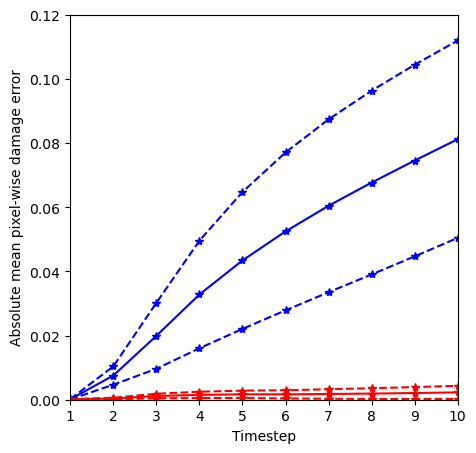

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), dpi=100)

axs.plot(np.arange(1, 11), dam_mean, 'b-*')
axs.plot(np.arange(1, 11), dam_mean+dam_std, 'b--*')
axs.plot(np.arange(1, 11), dam_mean-dam_std, 'b--*')
#axs.plot(np.arange(1, 11), dam_mean_total / (99 * 99), 'r-*')
#axs.plot(np.arange(1, 11), (dam_mean_total+dam_std_total) / (99 * 99), 'r--*')
#axs.plot(np.arange(1, 11), (dam_mean_total-dam_std_total) / (99 * 99), 'r--*')
axs.set_xlabel('Timestep')
axs.set_ylabel('Absolute mean pixel-wise damage error')
axs.set_xlim([1, 10])
axs.set_ylim([0, 0.12])

In [16]:
from NN_library.ConvNet.ConvNet_uniform import *
from NN_library.ConvNet.train_ConvNet import *

name = 'NN_library/ConvNet/ConvNet_uniform'
args = {'lr' : 0.001, 'epochs' : 20, 'dev' : dev, 'name' : name}
net = ConvNet(16)
net = load_network(net, args['name'], args)

L_stiff_ex, L_shr_ex = test_Conv(net, loaders, args)
L_shr_ex = np.array(L_shr_ex)
L_stiff_ex = np.array(L_stiff_ex)

L_stiff, L_shr = test_w_Auto(unet, net, loaders, args)
L_shr = np.array(L_shr)
L_stiff = np.array(L_stiff)

Using device: cuda


In [17]:
shr_mean_ex = np.mean(L_shr_ex, axis=0)
shr_std_ex = np.std(L_shr_ex, axis=0)
stiff_mean_ex = np.mean(L_stiff_ex, axis=0)
stiff_std_ex = np.std(L_stiff_ex, axis=0)

shr_mean = np.mean(L_shr, axis=0)
shr_std = np.std(L_shr, axis=0)
stiff_mean = np.mean(L_stiff, axis=0)
stiff_std = np.std(L_stiff, axis=0)

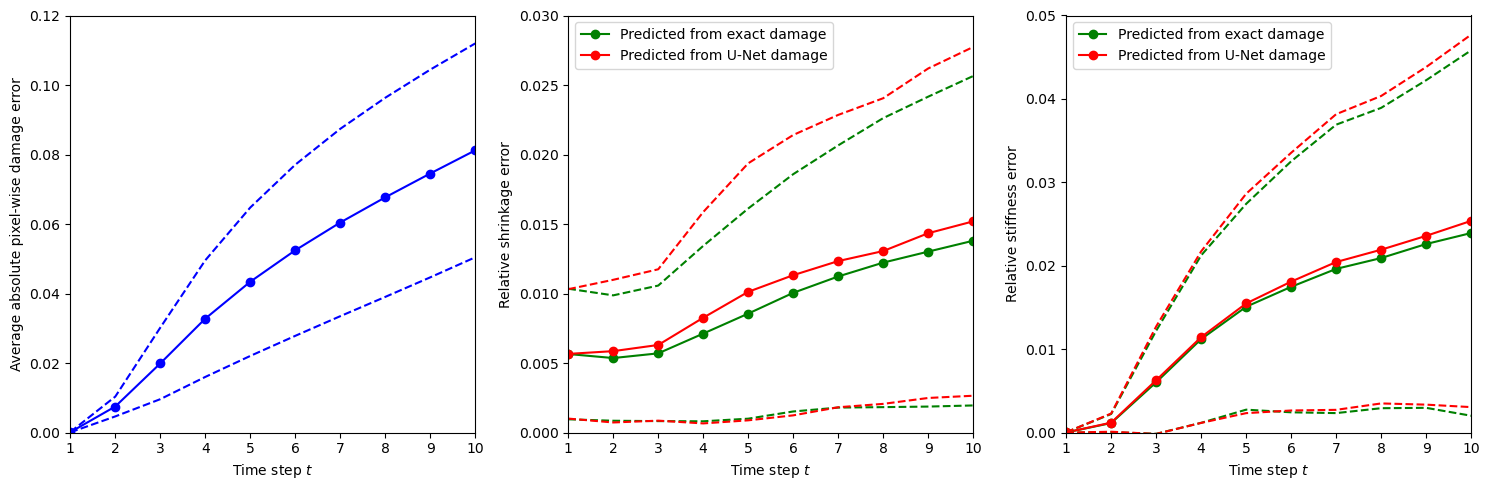

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), dpi=100)

axs.flat[0].plot(np.arange(1, 11), dam_mean, 'b-o')
axs.flat[0].plot(np.arange(1, 11), dam_mean+dam_std, 'b--')
axs.flat[0].plot(np.arange(1, 11), dam_mean-dam_std, 'b--')
axs.flat[0].set_xlabel('Time step $t$')
axs.flat[0].set_ylabel('Average absolute pixel-wise damage error')
axs.flat[0].set_xlim([1, 10])
axs.flat[0].set_ylim([0, 0.12])

axs.flat[1].plot(np.arange(1, 11), shr_mean_ex, 'g-o')
axs.flat[1].plot(np.arange(1, 11), shr_mean, 'r-o')
axs.flat[1].plot(np.arange(1, 11), shr_mean_ex+shr_std_ex, 'g--')
axs.flat[1].plot(np.arange(1, 11), shr_mean_ex-shr_std_ex, 'g--')
axs.flat[1].plot(np.arange(1, 11), shr_mean+shr_std, 'r--')
axs.flat[1].plot(np.arange(1, 11), shr_mean-shr_std, 'r--')
axs.flat[1].legend(['Predicted from exact damage', 'Predicted from U-Net damage'])
axs.flat[1].set_xlabel('Time step $t$')
axs.flat[1].set_ylabel('Relative shrinkage error')
axs.flat[1].set_xlim([1, 10])
axs.flat[1].set_ylim([0, 0.03])

axs.flat[2].plot(np.arange(1, 11), stiff_mean_ex, 'g-o')
axs.flat[2].plot(np.arange(1, 11), stiff_mean, 'r-o')
axs.flat[2].plot(np.arange(1, 11), stiff_mean_ex+stiff_std_ex, 'g--')
axs.flat[2].plot(np.arange(1, 11), stiff_mean_ex-stiff_std_ex, 'g--')
axs.flat[2].plot(np.arange(1, 11), stiff_mean+stiff_std, 'r--')
axs.flat[2].plot(np.arange(1, 11), stiff_mean-stiff_std, 'r--')
axs.flat[2].legend(['Predicted from exact damage', 'Predicted from U-Net damage'])
axs.flat[2].set_xlabel('Time step $t$')
axs.flat[2].set_ylabel('Relative stiffness error')
axs.flat[2].set_xlim([1, 10])
axs.flat[2].set_ylim([0, 0.05])

plt.tight_layout()

In [19]:
seq_test_dam = []
seq_test_stf = []
seq_test_shr = []
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = loaders['test'].dataset.__getitem__(1)
geometry = geometry.to(args['dev'])
damage = damage.to(args['dev'])
imp_shrinkage = imp_shrinkage.to(args['dev'])
for n in range(10):
    if n == 0:
        x = torch.cat([geometry, imp_shrinkage[[n+1]] / -0.001, damage[[n],:,:]], axis=1).view(1,3,99,99)
    else:
        x = torch.cat([geometry, imp_shrinkage[[n+1]] / -0.001, y[0].detach()], axis=1).view(1,3,99,99)
    y = unet(x)
    x_shr = torch.cat([geometry, imp_shrinkage[[n+1]] / -0.001, y[0].detach()], axis=1).view(1,3,99,99)
    y_shr = net(x_shr)
    seq_test_dam.append(y.detach().cpu())
    seq_test_stf.append(y_shr[0, 0].detach().cpu())
    seq_test_shr.append(y_shr[0, 1].detach().cpu())

seq_test_dam = np.array(seq_test_dam).squeeze()
seq_test_stf = np.array(seq_test_stf)
seq_test_shr = np.array(seq_test_shr)

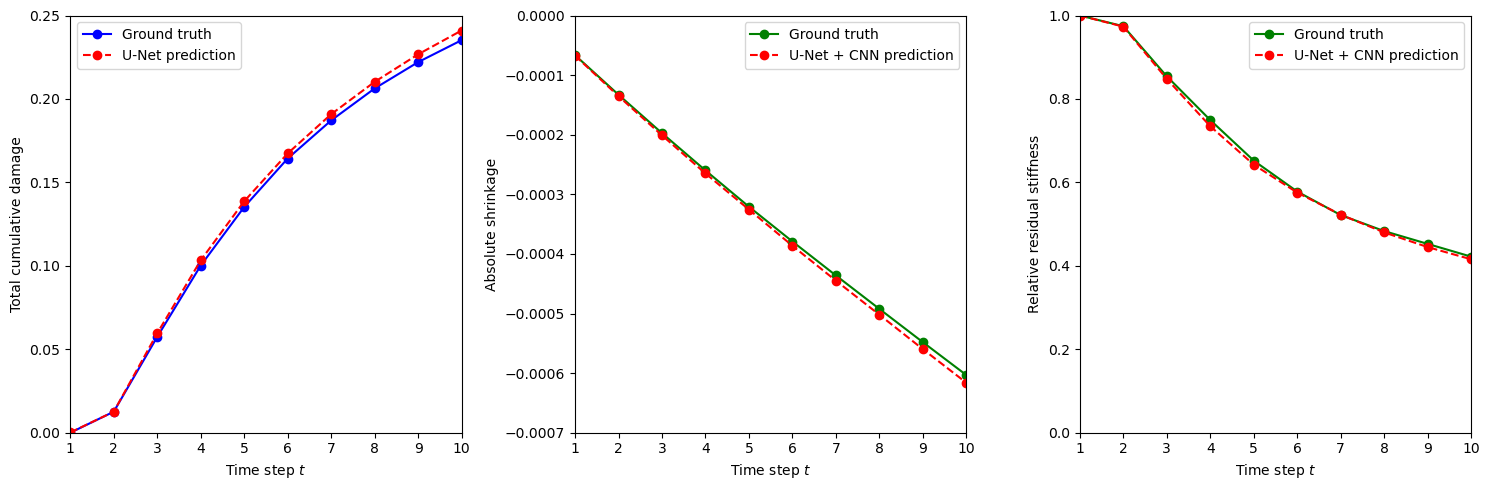

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), dpi=100)

axs.flat[0].plot(np.arange(1, 11), (damage[1:].sum(dim=(1, 2)) / (99 * 99)).cpu().detach(), 'b-o')
axs.flat[0].plot(np.arange(1, 11), seq_test_dam.sum(axis=(1, 2)) / (99 * 99), 'r--o')
axs.flat[0].legend(['Ground truth', 'U-Net prediction'])
axs.flat[0].set_xlabel('Time step $t$')
axs.flat[0].set_ylabel('Total cumulative damage')
axs.flat[0].set_xlim([1, 10])
axs.flat[0].set_ylim([0, 0.25])

axs.flat[1].plot(np.arange(1, 11), obs_shrinkage[1:], 'g-o')
axs.flat[1].plot(np.arange(1, 11), seq_test_shr * (-0.001), 'r--o')
axs.flat[1].legend(['Ground truth', 'U-Net + CNN prediction'])
axs.flat[1].set_xlabel('Time step $t$')
axs.flat[1].set_ylabel('Absolute shrinkage')
axs.flat[1].set_xlim([1, 10])
axs.flat[1].set_ylim([-0.0007, 0])

axs.flat[2].plot(np.arange(1, 11), stiffness[1:] / stiffness[0], 'g-o')
axs.flat[2].plot(np.arange(1, 11), seq_test_stf, 'r--o')
axs.flat[2].legend(['Ground truth', 'U-Net + CNN prediction'])
axs.flat[2].set_xlabel('Time step $t$')
axs.flat[2].set_ylabel('Relative residual stiffness')
axs.flat[2].set_xlim([1, 10])
axs.flat[2].set_ylim([0, 1])

plt.tight_layout()

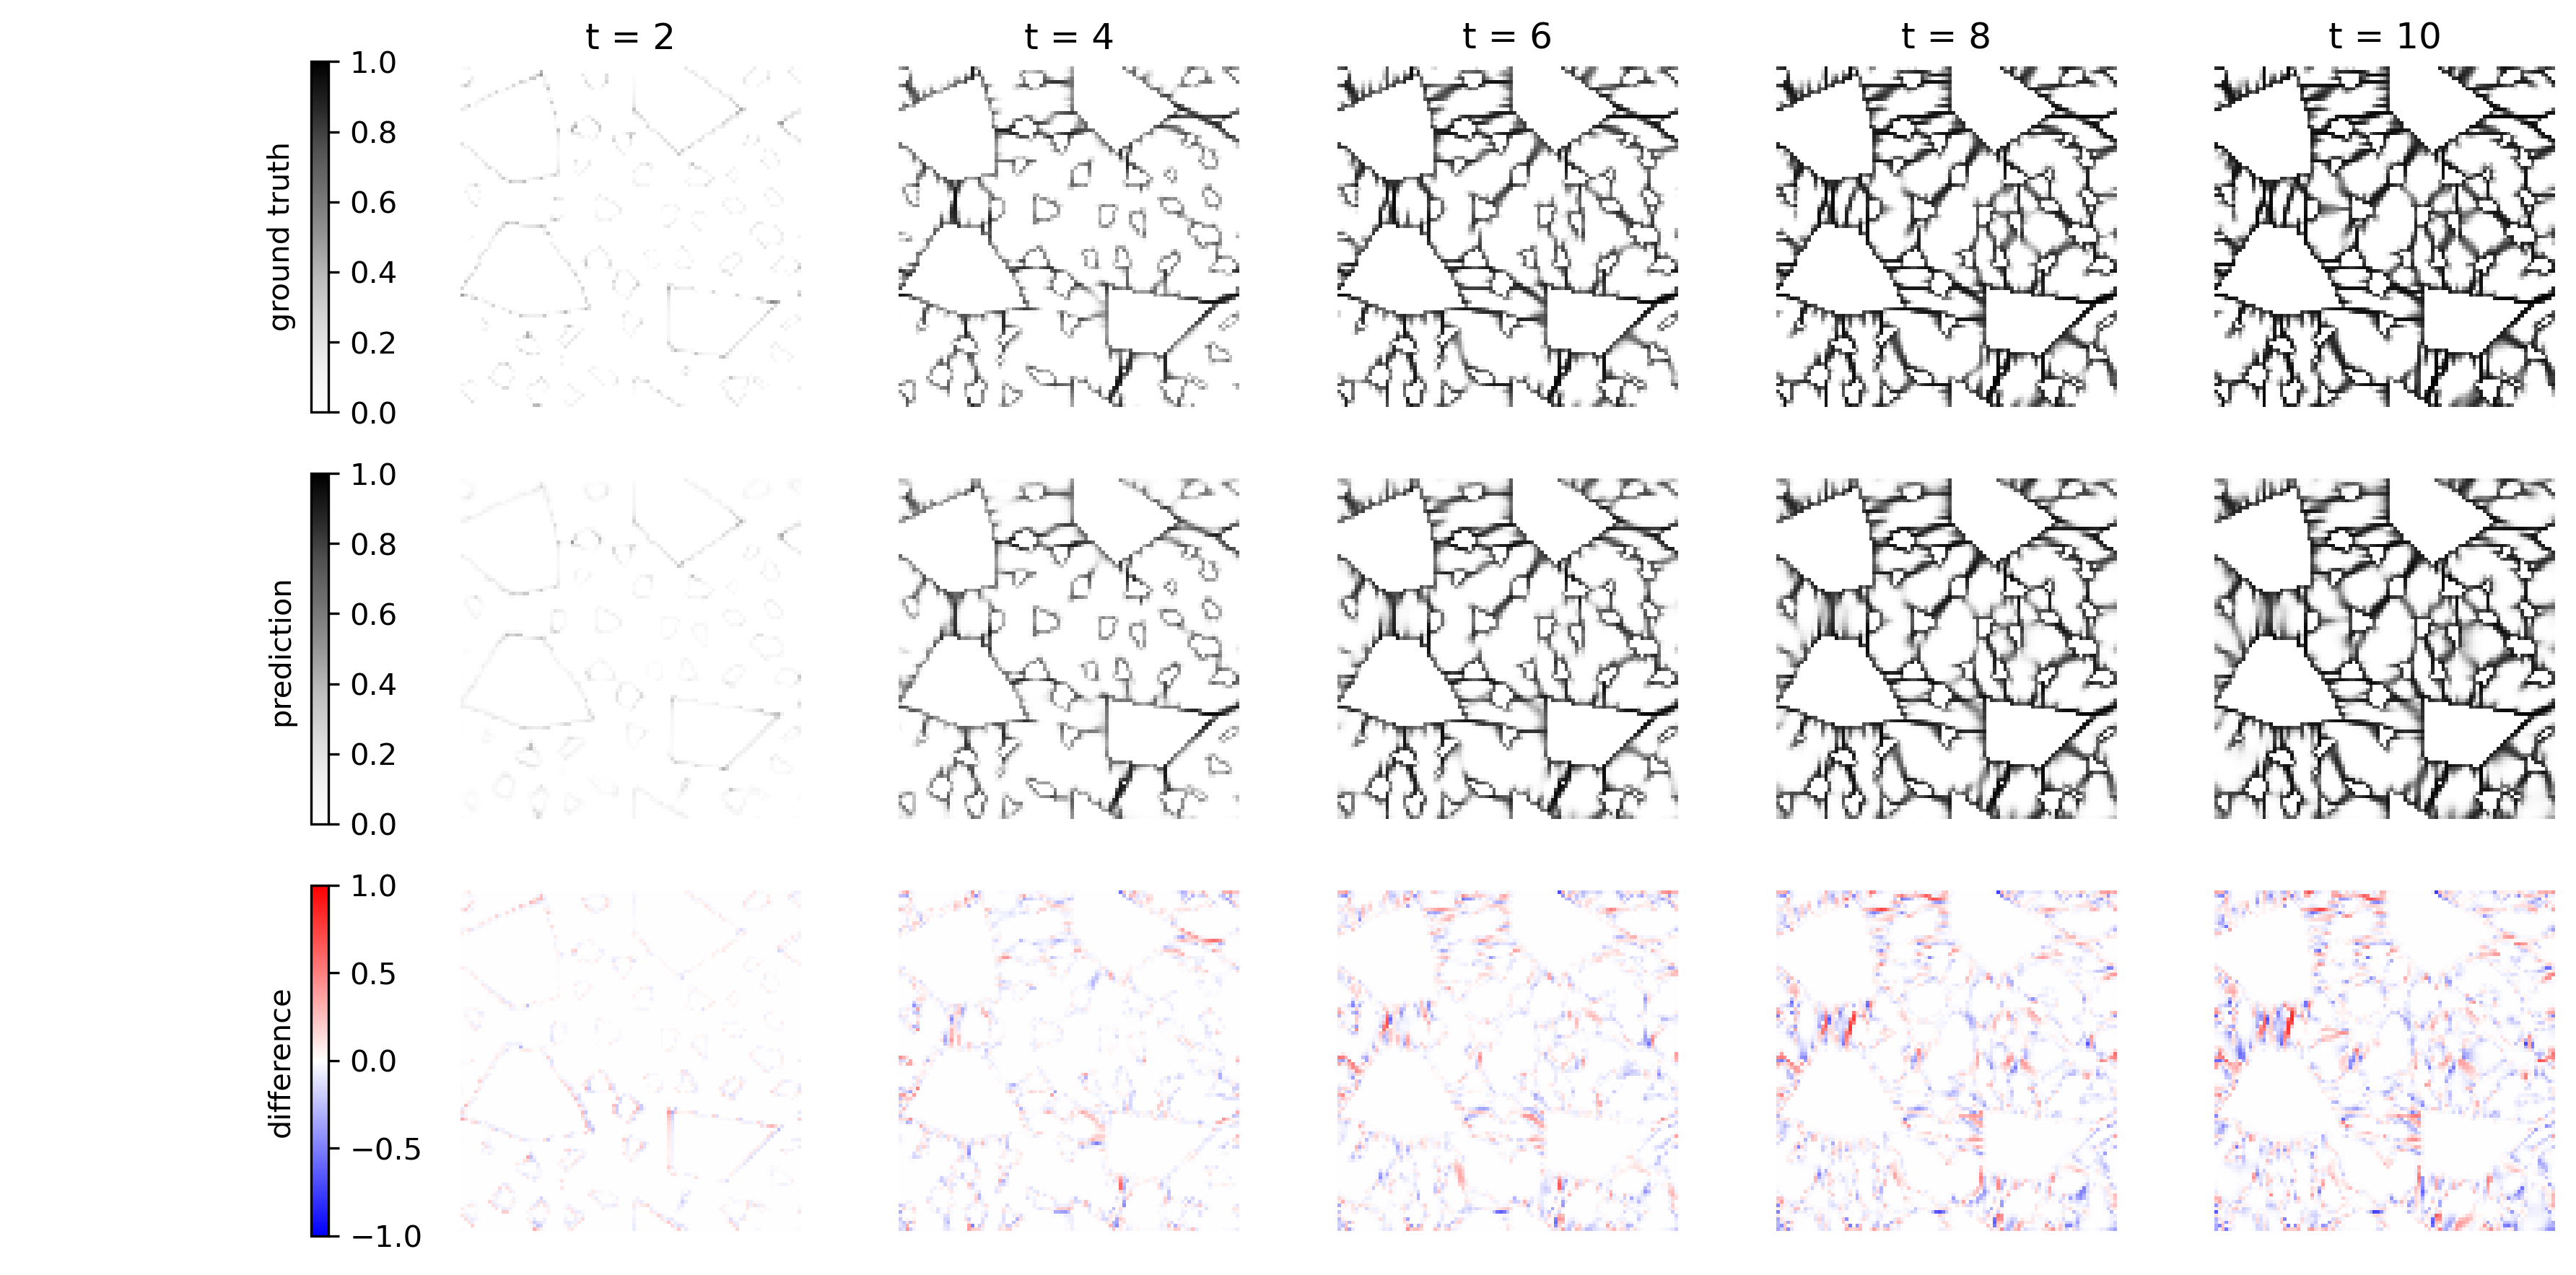

In [24]:
fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(12, 6), dpi=300)
for j in range(5):
    axs[0, j+1].imshow(damage[2*j+2].cpu().detach().numpy(), cmap='Greys', vmin=0, vmax=1)
    axs[0, j+1].set_title(f't = {2*j+2}')
    axs[0, j+1].set_axis_off()
    pos1 = axs[1, j+1].imshow(seq_test_dam[2*j+1], cmap='Greys', vmin=0, vmax=1)
    axs[1, j+1].set_axis_off()
    pos2 = axs[2, j+1].imshow((damage[2*j+2].cpu()-seq_test_dam[2*j+1]).detach().numpy(), cmap='bwr', vmin=-1, vmax=1)
    axs[2, j+1].set_axis_off()
axs[0,0].text(0.9, 0.25, 'ground truth', rotation='vertical')
axs[0,0].set_axis_off()
axs[1,0].text(0.9, 0.3, 'prediction', rotation='vertical')
axs[1,0].set_axis_off()
axs[2,0].text(0.9, 0.3, 'difference', rotation='vertical')
axs[2,0].set_axis_off()

fig.colorbar(pos1, ax=axs[0,0])
fig.colorbar(pos1, ax=axs[1,0])
fig.colorbar(pos2, ax=axs[2,0])
plt.tight_layout()

## Test on a dataset with weird geometry

In [115]:
data = dataset_uniform('weird')

In [137]:
seq_test_dam = []
seq_test_stf = []
seq_test_shr = []
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(10)
geometry = geometry.to(args['dev'])
damage = damage.to(args['dev'])
imp_shrinkage = imp_shrinkage.to(args['dev'])
for n in range(10):
    if n == 0:
        x = torch.cat([geometry, imp_shrinkage[[n+1]] / -0.001, damage[[n],:,:]], axis=1).view(1,3,99,99)
    else:
        x = torch.cat([geometry, imp_shrinkage[[n+1]] / -0.001, y[0].detach()], axis=1).view(1,3,99,99)
    y = unet(x)
    x_shr = torch.cat([geometry, imp_shrinkage[[n+1]] / -0.001, y[0].detach()], axis=1).view(1,3,99,99)
    y_shr = net(x_shr)
    seq_test_dam.append(y.detach().cpu())
    seq_test_stf.append(y_shr[0, 0].detach().cpu())
    seq_test_shr.append(y_shr[0, 1].detach().cpu())

seq_test_dam = np.array(seq_test_dam).squeeze()
seq_test_stf = np.array(seq_test_stf)
seq_test_shr = np.array(seq_test_shr)

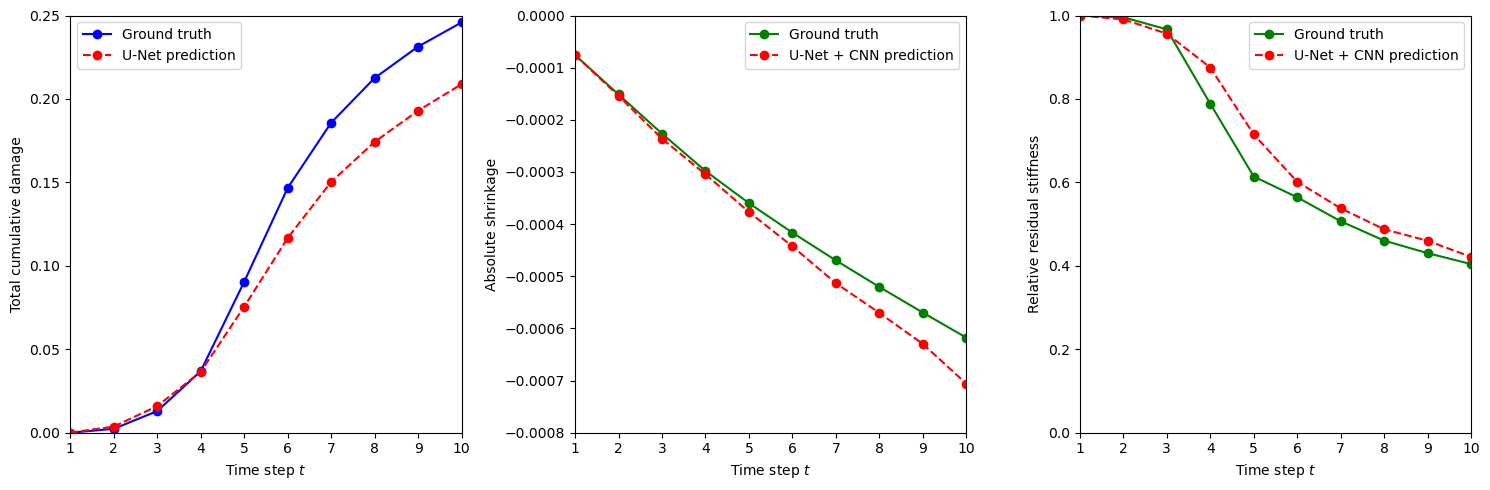

In [141]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), dpi=100)

axs.flat[0].plot(np.arange(1, 11), (damage[1:].sum(dim=(1, 2)) / (99 * 99)).cpu().detach(), 'b-o')
axs.flat[0].plot(np.arange(1, 11), seq_test_dam.sum(axis=(1, 2)) / (99 * 99), 'r--o')
axs.flat[0].legend(['Ground truth', 'U-Net prediction'])
axs.flat[0].set_xlabel('Time step $t$')
axs.flat[0].set_ylabel('Total cumulative damage')
axs.flat[0].set_xlim([1, 10])
axs.flat[0].set_ylim([0, 0.25])

axs.flat[1].plot(np.arange(1, 11), obs_shrinkage[1:], 'g-o')
axs.flat[1].plot(np.arange(1, 11), seq_test_shr * (-0.001), 'r--o')
axs.flat[1].legend(['Ground truth', 'U-Net + CNN prediction'])
axs.flat[1].set_xlabel('Time step $t$')
axs.flat[1].set_ylabel('Absolute shrinkage')
axs.flat[1].set_xlim([1, 10])
axs.flat[1].set_ylim([-0.0008, 0])

axs.flat[2].plot(np.arange(1, 11), stiffness[1:] / stiffness[0], 'g-o')
axs.flat[2].plot(np.arange(1, 11), seq_test_stf, 'r--o')
axs.flat[2].legend(['Ground truth', 'U-Net + CNN prediction'])
axs.flat[2].set_xlabel('Time step $t$')
axs.flat[2].set_ylabel('Relative residual stiffness')
axs.flat[2].set_xlim([1, 10])
axs.flat[2].set_ylim([0, 1])

plt.tight_layout()

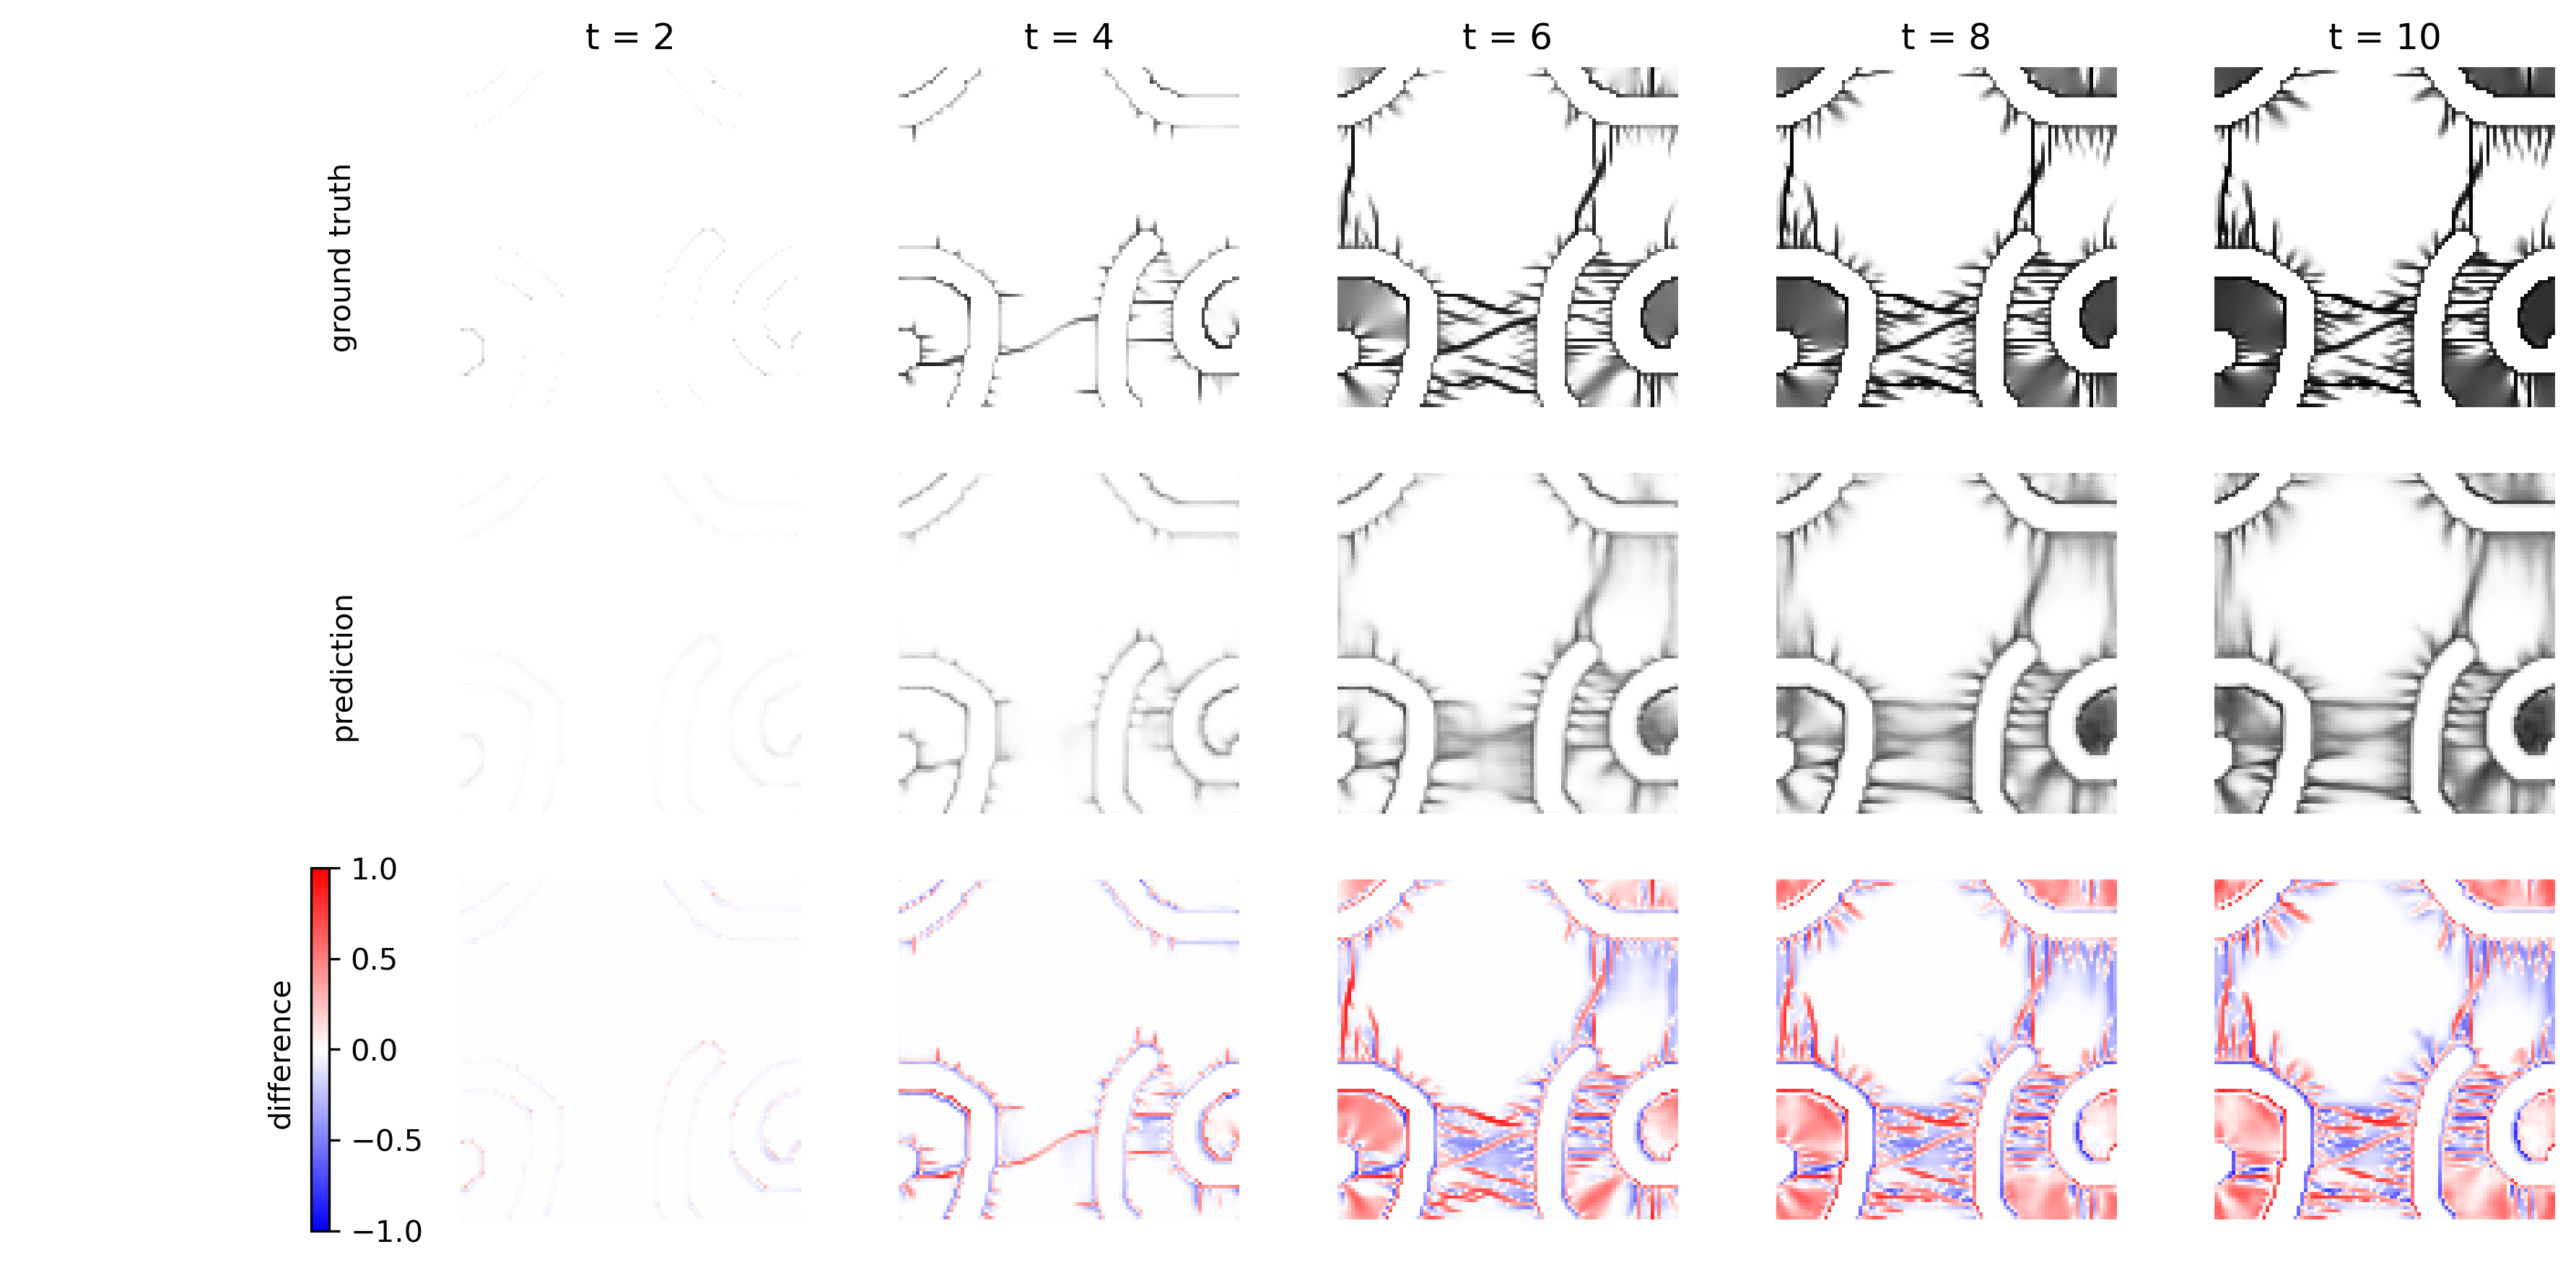

In [142]:
fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(12, 6), dpi=300)
for j in range(5):
    axs[0, j+1].imshow(damage[2*j+2].cpu().detach().numpy(), cmap='Greys', vmin=0, vmax=1)
    axs[0, j+1].set_title(f't = {2*j+2}')
    axs[0, j+1].set_axis_off()
    axs[1, j+1].imshow(seq_test_dam[2*j+1], cmap='Greys', vmin=0, vmax=1)
    axs[1, j+1].set_axis_off()
    pos = axs[2, j+1].imshow((damage[2*j+2].cpu()-seq_test_dam[2*j+1]).detach().numpy(), cmap='bwr', vmin=-1, vmax=1)
    axs[2, j+1].set_axis_off()
axs[0,0].text(0.9, 0.2, 'ground truth', rotation='vertical')
axs[0,0].set_axis_off()
axs[1,0].text(0.9, 0.25, 'prediction', rotation='vertical')
axs[1,0].set_axis_off()
axs[2,0].text(0.9, 0.3, 'difference', rotation='vertical')
axs[2,0].set_axis_off()

fig.colorbar(pos, ax=axs[2,0])
plt.tight_layout()

In [32]:
seq_test_dam = [[] for i in range(11)]
dam = []
geom = []
for i in range(11):
    geometry, damage, imp_shrinkage, _, _ = data.__getitem__(i)
    geometry = geometry.to(args['dev'])
    damage = damage.to(args['dev'])
    imp_shrinkage = imp_shrinkage.to(args['dev'])
    dam.append(damage)
    geom.append(geometry)
    for n in range(10):
        if n == 0:
            x = torch.cat([geometry, imp_shrinkage[[n+1]] / -0.001, damage[[n],:,:]], axis=1).view(1,3,99,99)
        else:
            x = torch.cat([geometry, imp_shrinkage[[n+1]] / -0.001, y[0].detach()], axis=1).view(1,3,99,99)
        y = unet(x)
        seq_test_dam[i].append(y.detach().cpu())

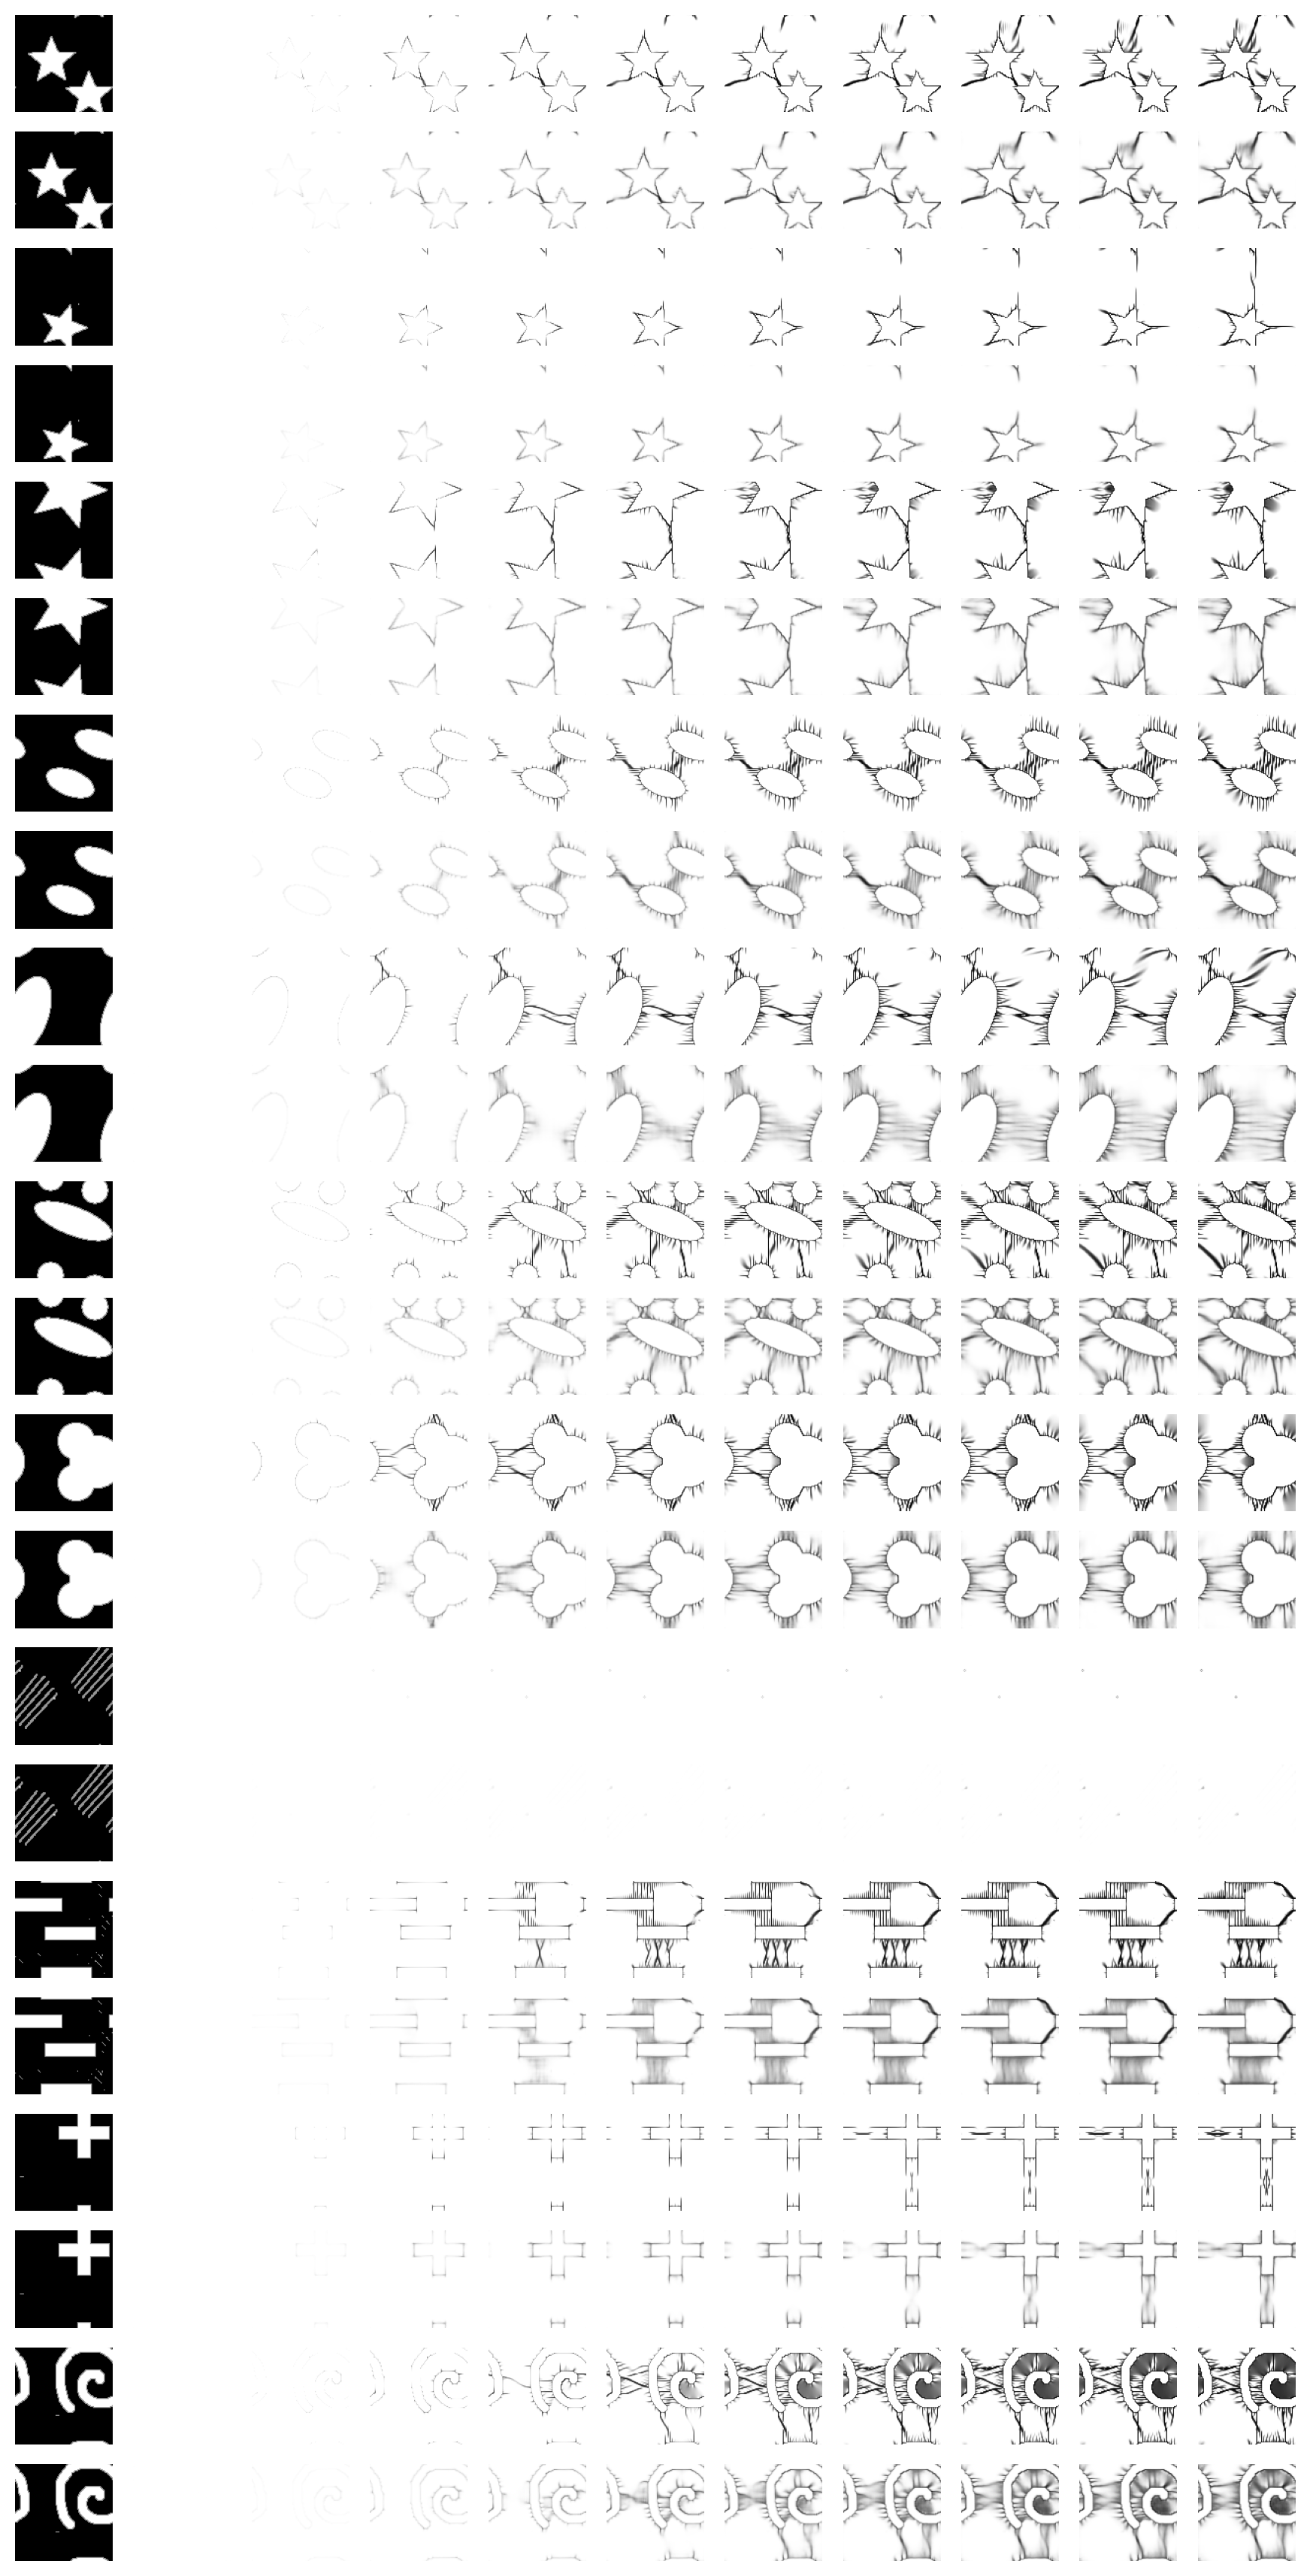

In [33]:
fig, axs = plt.subplots(nrows=22, ncols=11, figsize=(11, 22), dpi=200)
for i in range(11):
    axs[2*i, 0].imshow(geom[i][0].cpu().detach().cpu().numpy(), cmap='Greys', vmin=0, vmax=1)
    axs[2*i+1, 0].imshow(geom[i][0].cpu().detach().cpu().numpy(), cmap='Greys', vmin=0, vmax=1)
    axs[2*i, 0].set_axis_off()
    axs[2*i+1, 0].set_axis_off()
    for j in range(1,11):
        axs[2*i, j].imshow(dam[i][j].cpu().detach().cpu().numpy(), cmap='Greys', vmin=0, vmax=1)
        axs[2*i, j].set_axis_off()
    for j in range(1,11):
        axs[2*i+1, j].imshow(seq_test_dam[i][j-1][0, 0].cpu(), cmap='Greys', vmin=0, vmax=1)
        axs[2*i+1, j].set_axis_off()